# EE 460J Lab 2 Report
### Lab Group Members: Tatsushi Matsumoto, Nick Taylor, Matthew Withey

## Problem 1

In [3]:
#imports
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import pandas as pd
import seaborn as sns
from IPython.display import display

In [4]:
df1 = pd.read_csv('Lab2_Data/DF1', dtype = 'float')
df1.drop("Unnamed: 0", axis = 1, inplace = True)
samples, featues = df1.shape
display(df1)

,0,1,2,3
0,1.038502,0.899865,0.835053,-0.971528
1,0.320455,-0.647459,0.149079,0.352593
2,0.055480,2.234771,0.271672,-2.108739
3,-0.007260,-0.524299,-0.126550,0.670827
4,-1.237390,-1.377017,-1.049932,1.342079
...,...,...,...,...
9995,-0.632309,-0.145873,-0.797517,0.436184
9996,0.679417,-0.530216,0.526470,0.439397
9997,0.890697,-2.210855,1.072751,2.285372
9998,0.475293,0.490971,0.536909,-0.195772


In [5]:
df1_corr = df1.corr()
display(df1_corr)

,0,1,2,3
0,1.000000,-0.003998,0.990066,0.004111
1,-0.003998,1.000000,-0.004085,-0.990235
2,0.990066,-0.004085,1.000000,0.004067
3,0.004111,-0.990235,0.004067,1.000000


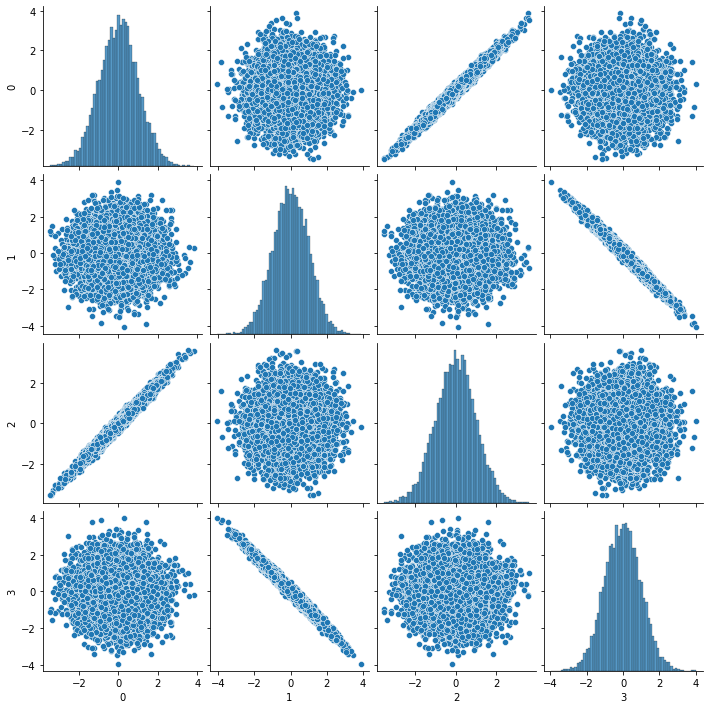

In [6]:
sns_corr1 = sns.pairplot(df1)
display(sns_corr1)

In [7]:
df1_cov_explicit = (df1.T.dot(df1))/(samples-1)
display(df1_cov_explicit)

,0,1,2,3
0,1.001617,-0.003940,0.991683,0.004060
1,-0.003940,1.005465,-0.004028,-0.995535
2,0.991683,-0.004028,1.001646,0.004017
3,0.004060,-0.995535,0.004017,1.005240


In [8]:
df1_cov = df1.cov()
display(df1_cov)

,0,1,2,3
0,1.001558,-0.004012,0.991624,0.004125
1,-0.004012,1.005378,-0.004099,-0.995457
2,0.991624,-0.004099,1.001589,0.004081
3,0.004125,-0.995457,0.004081,1.005168


Idk what to put here

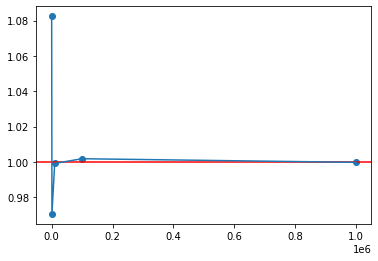

In [87]:
C = ([1, 0, 0], 
     [0, 1, 1], 
     [0, 1, 1])
mean = [0, 0, 0]
cov = [0, 0, 0, 0, 0]
y = [100, 1000, 10000, 100000, 1000000]
for i in range(5):
     Z = np.random.multivariate_normal(mean, C, 100*(10**i))
     temp = np.cov(Z[0::, 1], Z[0::, 2])
     cov[i] = temp[0, 0]
plt.axhline(y=1, color='r', linestyle='-')
plt.scatter(y, cov)
plt.plot(y, cov)
plt.show()

## Problem 2

In [10]:
df2 = pd.read_csv('Lab2_Data/DF2')
df2.drop("Unnamed: 0", axis = 1, inplace = True)
samples, featues = df2.shape
display(df2)

,0,1
0,1.038502,0.835053
1,0.320455,0.149079
2,0.055480,0.271672
3,-0.007260,-0.126550
4,-1.237390,-1.049932
...,...,...
9995,-0.632309,-0.797517
9996,0.679417,0.526470
9997,0.890697,1.072751
9998,0.475293,0.536909


<AxesSubplot:title={'center':'DF2 Scatter Plot'}, xlabel='col0', ylabel='col1'>

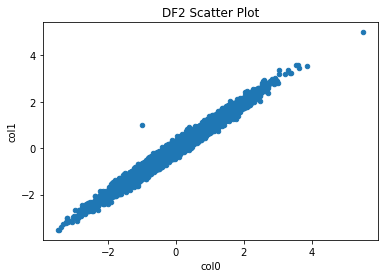

In [11]:
df2_sp = df2.plot.scatter(0, 1, xlabel = 'col0', ylabel = 'col1', title = 'DF2 Scatter Plot')
display(df2_sp)

In [12]:
df2_cov = df2.cov()
display(df2_cov)

,0,1
0,1.004648,0.994242
1,0.994242,1.004160


## Problem 3

In [13]:
# input (k, year), outputs top k names from year
def return_top(k, year):
    file = 'Names/Names/yob' + str(year) +'.txt'
    try:
        df_names = pd.read_csv(file, names=['Name', 'Gender', 'Frequency'])
        df_names_sorted = df_names.sort_values(by="Frequency", ascending=False)
        display(df_names_sorted.head(k))           
    except:
        print('Error: Year has no data')

return_top(5, 1880)

,Name,Gender,Frequency
942,John,M,9655
943,William,M,9531
0,Mary,F,7065
944,James,M,5927
945,Charles,M,5348
